# DS4A / COLOMBIA 4.0 

# Tema: Comportamiento del consumidor en el comercio electrónico

Data science for the digital future

- Ximena Rios Cotazo

- Ramon Manuel Sandoval 



## E-Commerce 

El comercio electrónico se define como la actividad de compra o venta de bienes a través de medios electrónicos en línea o en la red mundial. La llegada de Internet permitió un crecimiento sin precedentes de los canales de comunicación en todo el mundo. Como resultado, surgieron industrias y se desarrollaron mercados para compras en línea para satisfacer la demanda de productos que no estaban disponibles en el país.

El comercio electrónico ha dado lugar a un cambio en las estrategias de marketing y publicidad, lo que permite a las empresas llegar a los usuarios a través de múltiples canales (es decir, aplicaciones móviles) y expandir su alcance con un esfuerzo mínimo. En consecuencia, esto también ha generado cantidades sustanciales de datos del consumidor, que a través de un análisis matemático cuidadoso ofrece una capacidad poderosa pero perspicaz para reducir los comportamientos de gasto del consumidor, que a su vez impulsa sus ventas.

Además, la publicidad programática adaptada específicamente y la extracción de datos del consumidor ha provocado una nueva ola de empresas e industrias. El crecimiento exponencial de los datos generados a través de la "experiencia de compra en línea" permite a las empresas aprender y extraer información fundamental de las transacciones para desarrollar una visión de los segmentos de clientes, los sesgos, los precios y los hábitos de gasto.

## Planteamiento del problema

¿Qué aspectos del comportamiento en línea de los consumidores son útiles para que las empresas comprendan mejor a sus clientes y predigan las tendencias del consumidor, los hábitos de gasto y las variables relacionadas con las compras?

## Objetivos

- Comprensión y limpieza de datos
- Análisis y modelado
- Modelos de predicción
- Visualizacion de la información

## Requerimientos

In [1]:
import os

In [2]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics


# DATASET:  Conjunto de datos públicos brasileños de comercio electrónico de Olist

Este es un conjunto de datos públicos de comercio electrónico brasileño de pedidos realizados en Olist Store, tomado de [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_geolocation_dataset.csv ). El conjunto de datos tiene información de 100k pedidos realizados entre el 2016 y 2018 en múltiples mercados en Brasil. Sus características permiten ver un pedido desde múltiples dimensiones: desde el estado del pedido, el precio, el pago y el desempeño del flete hasta la ubicación del cliente, los atributos del producto y finalmente las reseñas escritas por los clientes. También publicamos un conjunto de datos de geolocalización que relaciona los códigos postales brasileños con las coordenadas lat / lng.

**Contexto**
Este conjunto de datos fue proporcionado generosamente por Olist, la tienda por departamentos más grande de los mercados brasileños. Olist conecta pequeñas empresas de todo Brasil con canales sin problemas y con un solo contrato. Estos comerciantes pueden vender sus productos a través de Olist Store y enviarlos directamente a los clientes mediante los socios logísticos de Olist. 

Después de que un cliente compra el producto en Olist Store, un vendedor recibe una notificación para cumplir con ese pedido. Una vez que el cliente recibe el producto, o se vence la fecha estimada de entrega, el cliente recibe una encuesta de satisfacción por correo electrónico donde puede dar una nota por la experiencia de compra y escribir algunos comentarios.

**Atención**
Un pedido puede tener varios artículos.
Cada artículo puede ser realizado por un vendedor distinto.
Todo el texto que identifica tiendas y socios fue reemplazado por los nombres de las grandes casas. 

**Esquema de datos**
Para una mejor comprensión y organización, los conjuntos de datos proporcionados se distribuyen en nueve conjuntos primarios, cuatro de los cuales se cargan a continuacion: 

In [3]:
ruta=os.getcwd()+'/data/'

In [4]:
customer = pd.read_csv(ruta+'olist_customers_dataset.csv', delimiter=',') 
order_items=pd.read_csv(ruta+'olist_order_items_dataset.csv', delimiter=',') 
orders=pd.read_csv(ruta+'olist_orders_dataset.csv', delimiter=',') 
products=pd.read_csv(ruta+'olist_products_dataset.csv', delimiter=',') 
order_payments=pd.read_csv(ruta+'olist_order_payments_dataset.csv', delimiter=',')

# City and product trends

In this part we try to analyze which is the trend of online shopping by city.

For this analysis we generate a dataset called ```df```, which is obtained by crossing the fields: ```order_id,customer_id```, ```customer_unique_id```, ```ustomer_city,customer_state```, ```order_item_id```,  ```product_id```, ```product_category_name```   of the dataframes: ```olist_customers_dataset```, ```olist_order_items_dataset```, ```olist_orders_dataset```, ```olist_products_dataset```. For this we use pyhton's ```merge``` function:

In [5]:
# order_id:Identificador único del pedido. customer_id: Id del cliente.customer_unique_id: Identificador único de un cliente.
df1=orders[['order_id','customer_id']] 
df2=customer[['customer_id','customer_unique_id','customer_city','customer_state']] 
df=pd.merge(df1, df2, how="left", left_on="customer_id", right_on="customer_id")

In [6]:
#product_id: Identificador único del producto.order_item_id: identifica el número de artículosincluido en el mismo pedido.
df3=order_items[['order_id','order_item_id','product_id']] 
df=pd.merge(df, df3, how="left", left_on="order_id", right_on="order_id")

In [7]:
#product_category_name:Categoría raíz del producto, en portugués
df4=products[['product_id','product_category_name']] 
df=pd.merge(df, df4, how="left", left_on="product_id", right_on="product_id")

The states are by [ISO code](https://es.wikipedia.org/wiki/Anexo:Estados_de_Brasil), we create an dictionary (```estados```) with these codes and the corresponding name, and another dictionary (```regiones```) with the regions for each state, then we add two columns to the dataframe, one with the name of the state and the other with the region, we do this for a more comfortable viewing.

In [8]:
estados= {'AC':'Acre', 'AL':'Alagoas', 'AM':'Amazonas', 'AP':'Amapá', 'BA':'Bahía', 'CE':'Ceará',
          'DF':'Distrito Federal', 'ES':'Espírito Santo', 'GO':'Goiás', 'MA':'Maranhão', 'MG':'Minas Gerais',
          'MS':'Mato Grosso del Sur', 'MT':'Mato Grosso', 'PA':'Pará', 'PB':'Paraíba', 'PE':'Pernambuco',
          'PI':'Piauí', 'PR':'Paraná', 'RJ':'Río de Janeiro', 'RN':'Río Grande del Norte', 'RO':'Rondonia',
          'RR':'Roraima', 'RS':'Río Grande del Sur', 'SC':'Santa Catarina', 'SE':'Sergipe', 'SP':'São Paulo', 'TO':'Tocantins'}
df['name_state']=df['customer_state']
for i in range(len(estados)):
    df["name_state"]=df["name_state"].str.replace(list(estados.keys())[i],list(estados.values())[i])

In [9]:
region = ["Norte","Sur","Sudeste","Nordeste","CentroOeste"]
regiones= {'AC':'Norte', 'AL':'Nordeste', 'AM':'Norte', 'AP':'Norte', 'BA':'Nordeste',
           'CE':'Nordeste', 'DF':'CentroOeste', 'ES':'Sudeste', 'GO':'CentroOeste',
           'MA':'Nordeste', 'MG':'Sudeste', 'MS':'CentroOeste', 'MT':'CentroOeste',
           'PA':'Norte', 'PB':'Nordeste', 'PE':'Nordeste', 'PI':'Nordeste', 'PR':'Sur',
           'RJ':'Sudeste', 'RN':'Nordeste', 'RO':'Norte', 'RR':'Norte', 'RS':'Sur',
           'SC':'Sur', 'SE':'Nordeste', 'SP':'Sudeste', 'TO':'Norte'}
df['regions']=df['customer_state']
for i in range(len(estados)):
    df["regions"]=df["regions"].str.replace(list(regiones.keys())[i],list(regiones.values())[i])

In [10]:
df[['order_id','customer_city','customer_state','regions','name_state']].head(2)

,order_id,customer_city,customer_state,regions,name_state
0,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,SP,Sudeste,São Paulo
1,53cdb2fc8bc7dce0b6741e2150273451,barreiras,BA,Nordeste,Bahía


## Purchases by state

We generate a graph with the amount of online purchases made in each state

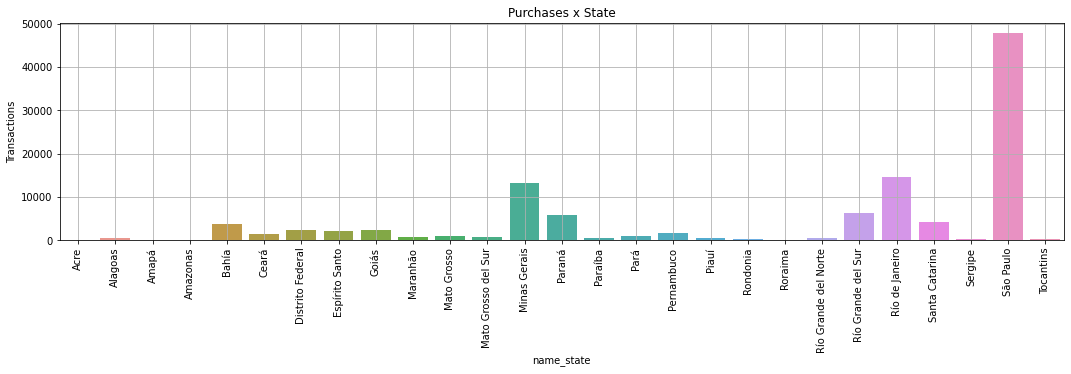

In [11]:
plt.figure(figsize=(18, 4))
aux=df.groupby('name_state').size().to_frame().rename(columns={0:'Transactions'}).head(27).reset_index()
ax=sns.barplot(x='name_state',y='Transactions',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Purchases x State')
ax.grid()

The states that make the most purchases are Sao Pablo and Rio de Janeiro, the two main states in the country.

## Most selled products

The dataframe has 74 categories of products, we generate a graph with the amount of products sold by category and organize it descendingly.

The dataframe has  74  categories of products


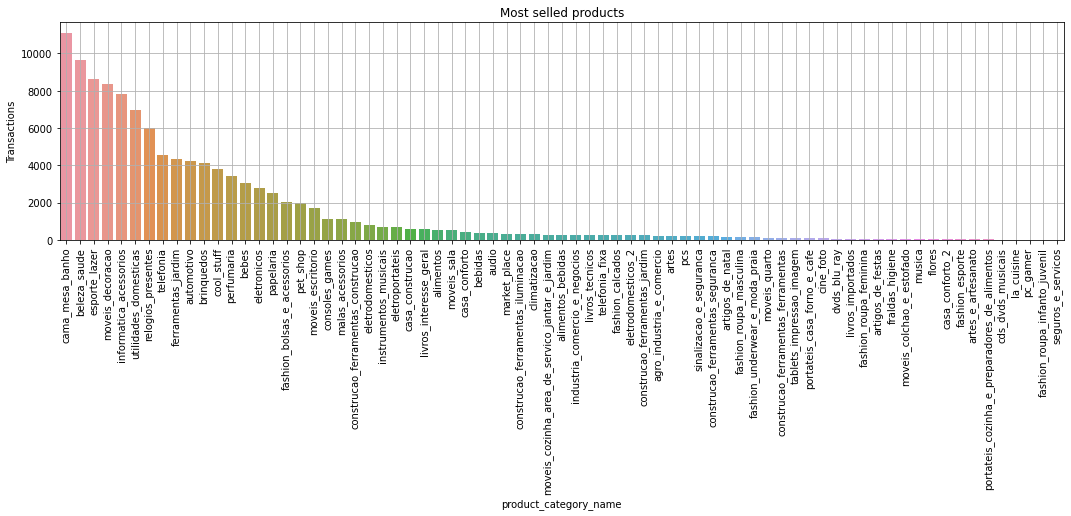

In [12]:
plt.figure(figsize=(18, 4))
aux=df.groupby('product_category_name').size().to_frame().rename(columns={0:'Transactions'}).sort_values('Transactions', ascending=False).head(74).reset_index()
listaP=list(aux["product_category_name"])
ax=sns.barplot(x='product_category_name',y='Transactions',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Most selled products')
ax.grid()
print("The dataframe has ",len(df['product_category_name'].unique())," categories of products")

## Cities with the highest number of sales

The dataframe has 4119 cities, we take the 50 cities that have the most registered sales, and we generate a graph with the number of sales per city, organized in descending order.

We have 4119 cities, the 50 that register the highest number of sales are shown


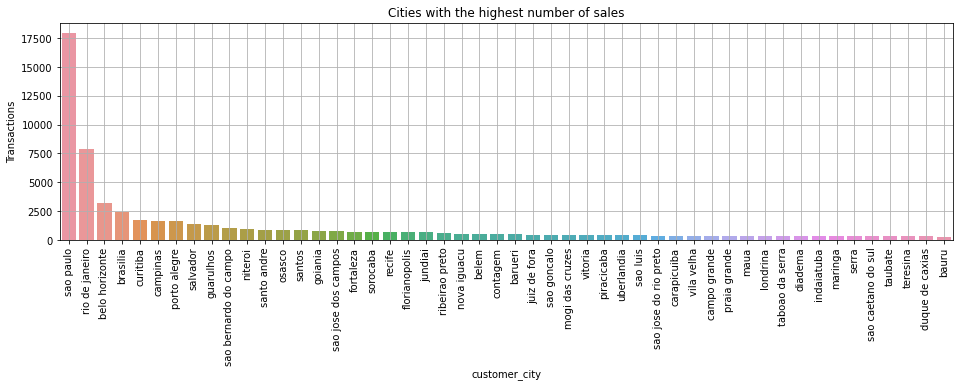

In [13]:
plt.figure(figsize=(16, 4))
aux=df.groupby('customer_city').size().to_frame().rename(columns={0:'Transactions'}).sort_values('Transactions', ascending=False).head(50).reset_index()
listaC=list(aux["customer_city"])
ax=sns.barplot(x='customer_city',y='Transactions',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Cities with the highest number of sales')
ax.grid()
print("We have", len(df["customer_city"].unique()),"cities, the 50 that register the highest number of sales are shown")

## Best-selling products by city

The dataframe has 74 product categories, we generate a graph with the amount of products sold by city and we organize it in descending order, we take the 10 cities that register the highest number of sales.

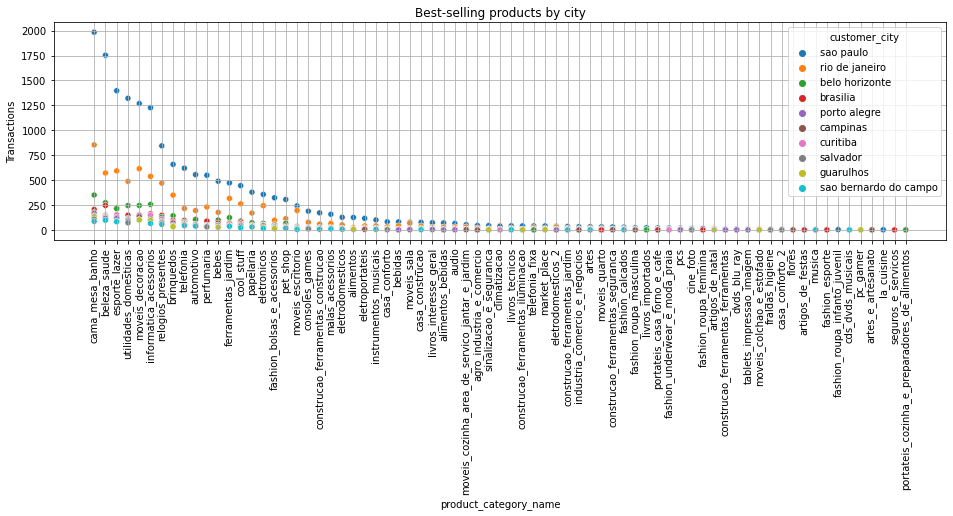

In [14]:
listaC2=listaC[:10]
plt.figure(figsize=(16, 4))
aux=df[(df["customer_city"].isin(listaC2))][["product_category_name","customer_city"]]
aux=aux.groupby(["product_category_name","customer_city"]).size().to_frame().rename(columns={0:'Transactions'}).reset_index()
aux=aux.sort_values('Transactions', ascending=False)
#aux=aux[:50]
#ax=sns.lineplot(x='product_category_name', y='Number de transaciones', hue='customer_city', data=aux)
ax=sns.scatterplot(x='product_category_name', y='Transactions', hue='customer_city', data=aux)
plt.xticks(rotation=90)
ax.set_title('Best-selling products by city')
ax.grid()

## Best-selling products by state

The dataframe has 74 product categories, we generate a graph with the amount of products sold by state and we organize it in descending order.

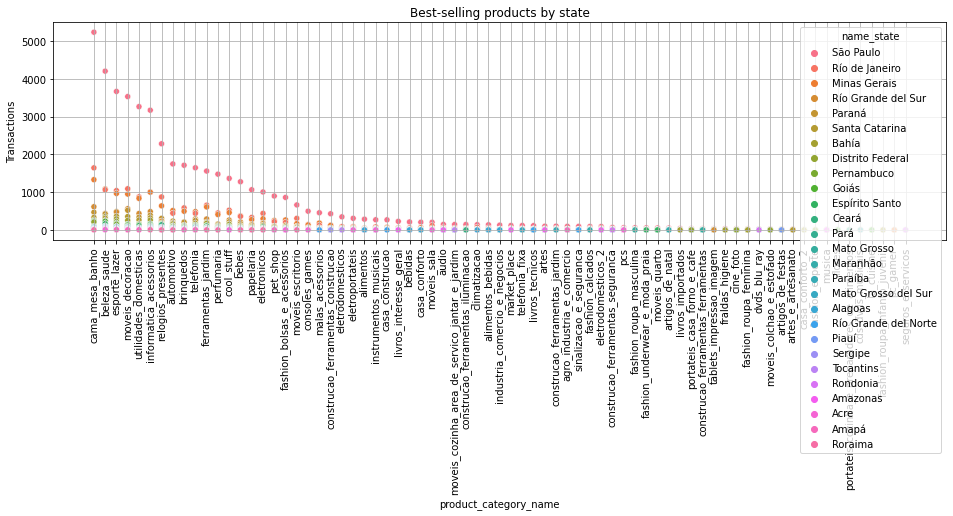

In [15]:
plt.figure(figsize=(16, 4))
aux=df[["product_category_name","name_state"]]
aux=aux.groupby(["product_category_name","name_state"]).size().to_frame().rename(columns={0:'Transactions'}).reset_index()
aux=aux.sort_values('Transactions', ascending=False)
#aux=aux[:50]
#ax=sns.lineplot(x='product_category_name', y='Number de transaciones', hue='customer_city', data=aux)
ax=sns.scatterplot(x='product_category_name', y='Transactions', hue='name_state', data=aux)
plt.xticks(rotation=90)
ax.set_title('Best-selling products by state')
ax.grid()

## Best-selling products by region

The dataframe has 74 product categories, we generate a graph with the amount of products sold by region and we organize it in descending order.

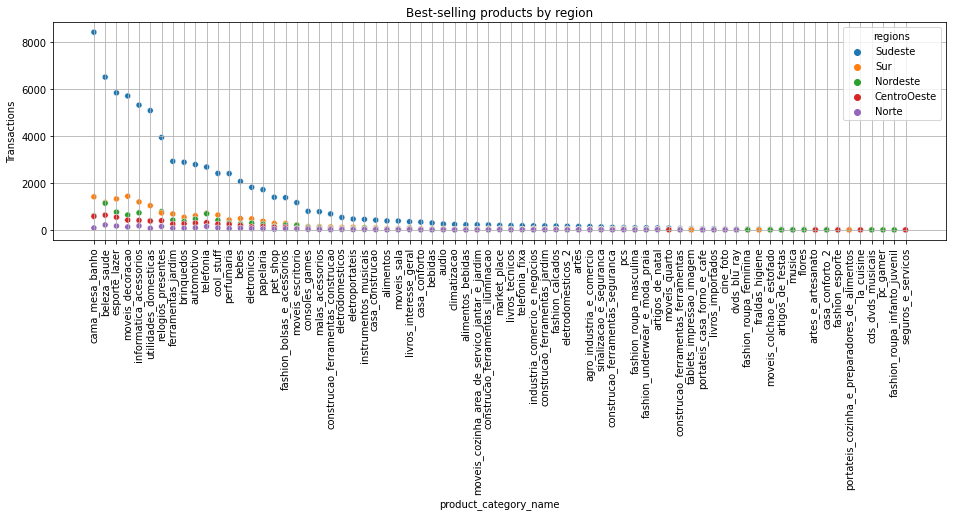

In [16]:
plt.figure(figsize=(16, 4))
aux=df[["product_category_name","regions"]]
aux=aux.groupby(["product_category_name","regions"]).size().to_frame().rename(columns={0:'Transactions'}).reset_index()
aux=aux.sort_values('Transactions', ascending=False)
#aux=aux[:50]
#ax=sns.lineplot(x='product_category_name', y='Number de transaciones', hue='customer_city', data=aux)
ax=sns.scatterplot(x='product_category_name', y='Transactions', hue='regions', data=aux)
plt.xticks(rotation=90)
ax.set_title('Best-selling products by region')
ax.grid()

# Highest Income per Category Alejandro

In [6]:
a=pd.merge(order_items, orders, on=['order_id'])
merged_df=pd.merge(a, products, on=['product_id'])

In [7]:
merged_df.order_status.value_counts()

delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

In [12]:
top50categories_df=merged_df['price'].groupby(merged_df['product_category_name']).sum().sort_values(ascending=False)[:50]
top50categories_df"

product_category_name
beleza_saude                                      1258681.34
relogios_presentes                                1205005.68
cama_mesa_banho                                   1036988.68
esporte_lazer                                      988048.97
informatica_acessorios                             911954.32
moveis_decoracao                                   729762.49
cool_stuff                                         635290.85
utilidades_domesticas                              632248.66
automotivo                                         592720.11
ferramentas_jardim                                 485256.46
brinquedos                                         483946.60
bebes                                              411764.89
perfumaria                                         399124.87
telefonia                                          323667.53
moveis_escritorio                                  273960.70
papelaria                                          230943.23
pc

Text(0, 0.5, 'Product Category')

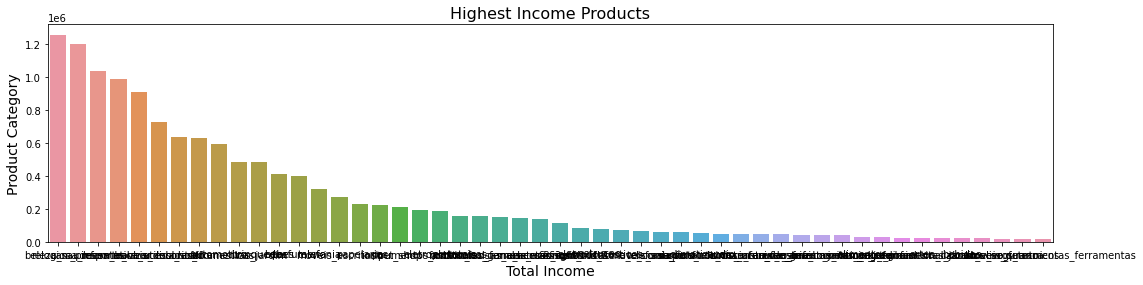

In [13]:
fig=plt.figure(figsize=(18,4))
sns.barplot(y=top50categories_df.values,x=top50categories_df.index)
plt.title('Highest Income Products',fontsize=16)
plt.xlabel('Total Income',fontsize=14)
plt.ylabel('Product Category',fontsize=14)

It's interesting looking at this chart that the highest incomes for the platform come from the category health, beauty.

# Late Deliveries Alejandro

In [19]:
delivered_time = pd.to_datetime(merged_df.order_delivered_customer_date)
estimated_time = pd.to_datetime(merged_df.order_estimated_delivery_date)
merged_df["late_delivery"] = delivered_time - estimated_time
merged_df["late_delivery"]=merged_df["late_delivery"]/np.timedelta64(1,"D")

In [20]:
late_deliveries_df = merged_df[merged_df.late_delivery > 0]
late_deliveries_df[["product_category_name", "order_delivered_customer_date", "order_estimated_delivery_date", "late_delivery"]].head(10)

,product_category_name,order_delivered_customer_date,order_estimated_delivery_date,late_delivery
5,cool_stuff,2017-08-31 20:19:52,2017-08-24 00:00:00,7.847130
16,ferramentas_jardim,2018-04-02 22:32:10,2018-03-23 00:00:00,10.939005
29,utilidades_domesticas,2017-07-10 11:46:40,2017-07-10 00:00:00,0.490741
36,beleza_saude,2018-03-29 18:17:31,2018-03-29 00:00:00,0.762164
68,beleza_saude,2018-05-23 17:51:15,2018-05-16 00:00:00,7.743924
69,beleza_saude,2018-05-23 17:51:15,2018-05-16 00:00:00,7.743924
71,beleza_saude,2018-02-24 16:26:53,2018-02-21 00:00:00,3.685336
97,fashion_bolsas_e_acessorios,2018-08-07 13:56:52,2018-08-07 00:00:00,0.581157
120,cama_mesa_banho,2017-09-04 13:34:13,2017-08-31 00:00:00,4.565428
121,cama_mesa_banho,2018-03-29 23:42:46,2018-03-16 00:00:00,13.988032


# Difference Between Order Approved and Delivered Alejandro

In [25]:
delivered_time = pd.to_datetime(merged_df.order_delivered_customer_date)
approved_time = pd.to_datetime(merged_df.order_approved_at)
merged_df["delivery_time"] = delivered_time - approved_time
merged_df["delivery_time"] = merged_df["delivery_time"]/np.timedelta64(1,"D")

In [26]:
delivery_time_df = merged_df[merged_df.delivery_time > 0]
delivery_time_df[["product_category_name", "order_delivered_customer_date", "order_estimated_delivery_date", "late_delivery"]].head(10)

,product_category_name,order_delivered_customer_date,order_estimated_delivery_date,late_delivery
0,cool_stuff,2017-09-20 23:43:48,2017-09-29 00:00:00,-8.011250
1,cool_stuff,2017-07-13 20:39:29,2017-07-26 00:00:00,-12.139248
2,cool_stuff,2018-06-04 18:34:26,2018-06-07 00:00:00,-2.226088
3,cool_stuff,2017-08-09 21:26:33,2017-08-25 00:00:00,-15.106563
4,cool_stuff,2017-08-24 20:04:21,2017-09-01 00:00:00,-7.163646
5,cool_stuff,2017-08-31 20:19:52,2017-08-24 00:00:00,7.847130
6,cool_stuff,2018-03-28 21:57:44,2018-04-12 00:00:00,-14.084907
7,cool_stuff,2017-08-14 18:13:03,2017-09-06 00:00:00,-22.240938
8,cool_stuff,2017-06-26 13:52:03,2017-07-06 00:00:00,-9.422187
9,pet_shop,2017-05-12 16:04:24,2017-05-15 00:00:00,-2.330278


# Tendencia de ventas por hora o dia de la semana LUISA

# Tendencias de Medio de pago 

In [33]:
efective_orders=orders[(orders.order_status!= 'canceled') & (orders.order_status!= 'unavailable')]

In [12]:
#payment_orders= pd.concat([order_payments,efective_orders], axis=1)
payment_orders=pd.merge(order_payments, efective_orders)

In [29]:
import datetime
timesMonth=[]
timesYear=[]
weekday=[]
hour=[]
for i in payment_orders['order_purchase_timestamp']:
    fecha=pd.to_datetime(i)
    timesMonth.append(fecha.month)
    timesYear.append(fecha.year)
    weekday.append(fecha.dayofweek)
    hour.append(fecha.hour)
payment_orders['Month']=timesMonth
payment_orders['Year']=timesYear
payment_orders['WeekDay']=weekday
payment_orders['Hour']=hour
payment_orders.head()
# pd.datetime.now().year*100+pd.datetime.now().month

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,WeekDay,Hour
23063,8d1d09cecb392f024da77ada654625c5,1,credit_card,1,76.94,4608ffc5f70a8c67bf129d6770948fb3,delivered,2017-10-23 17:11:15,2017-10-23 17:35:33,2017-10-24 16:58:57,2017-10-27 20:41:50,2017-11-09 00:00:00,10,2017,0,17
71097,4a82a56f850507b43e8aceaed75a091b,1,boleto,1,115.24,ce592ad7925e24b891730859400babe3,delivered,2018-03-26 11:29:37,2018-03-26 13:08:34,2018-03-27 19:13:06,2018-04-13 01:22:37,2018-04-23 00:00:00,3,2018,0,11
11829,9941a0a6225e94809b6d9955bb16b594,1,credit_card,1,51.05,7ea85f585581eb47056e7d88bc9dd900,delivered,2018-03-26 10:35:15,2018-03-26 10:47:54,2018-03-26 23:08:47,2018-03-27 17:12:59,2018-04-09 00:00:00,3,2018,0,10
36143,a38aeb63e6290170677c4cf2ab4c0f7f,1,credit_card,6,163.79,62e1860ef3884fd9e103e75783dca1c0,delivered,2018-03-26 10:14:31,2018-03-26 10:31:11,2018-03-26 22:12:20,2018-04-02 18:34:32,2018-04-17 00:00:00,3,2018,0,10
80436,a9ca52be3b3e9d4dc6b7d66e2712b35f,1,credit_card,1,20.29,e6f9f570718a77ca7fa6e26ce9ec12ed,delivered,2018-03-26 09:19:53,2018-03-26 09:35:34,2018-03-27 20:12:35,2018-03-29 13:37:52,2018-04-06 00:00:00,3,2018,0,9


#### Most people in Brazil E Commerce use Credit Card  to pay their buys

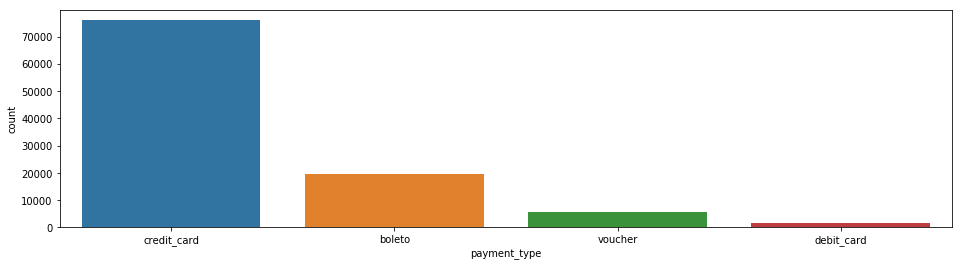

In [15]:
plt.figure(figsize=(16, 4))
sns.countplot('payment_type',data=payment_orders)

plt.show()

#### Sales of best-selling products, show the same behavior as total sales

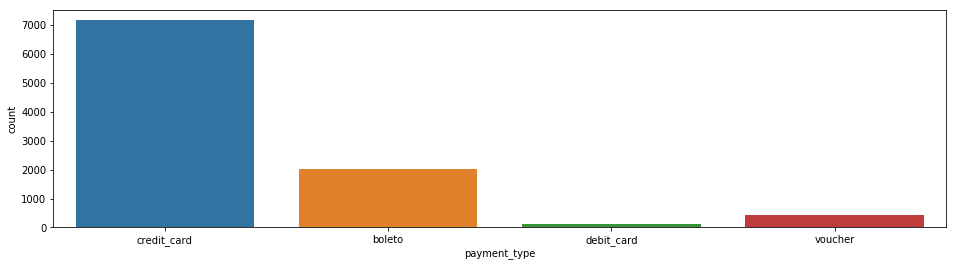

In [32]:
#Sales with more seller products(mor than 100 units per product)
dfrs = order_items.groupby('product_id').count()
dfrs.sort_values(by=['order_id'], ascending=False, inplace=True)
dfrs1 = dfrs[(dfrs['order_id']>100)]
ListProducts=dfrs1.index
ListOrders=order_items[(order_items['product_id'].isin(ListProducts))]['order_id'].unique()
pop=payment_orders[(payment_orders['order_id']).isin(ListOrders)]
plt.figure(figsize=(16, 4))
sns.countplot('payment_type',data=pop)
plt.show()

## There is no relevant information in a general line of time

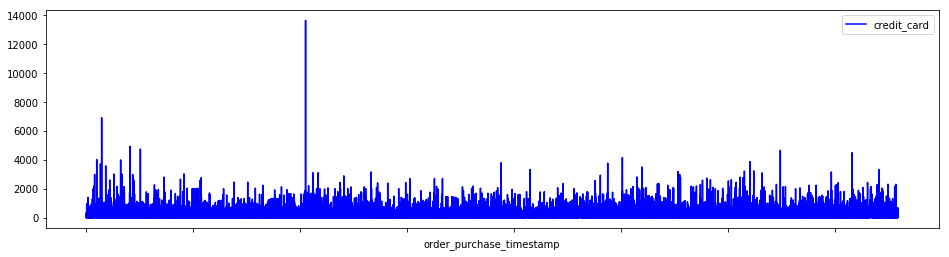

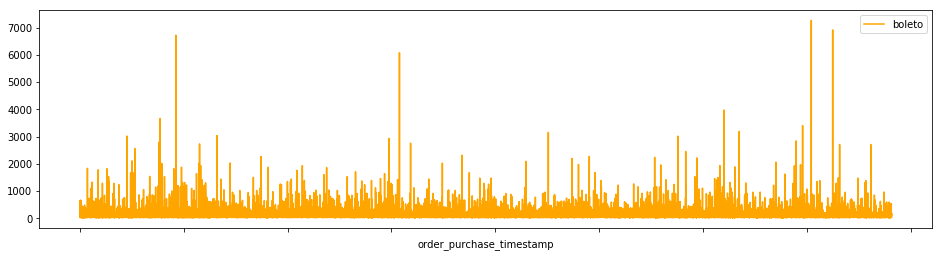

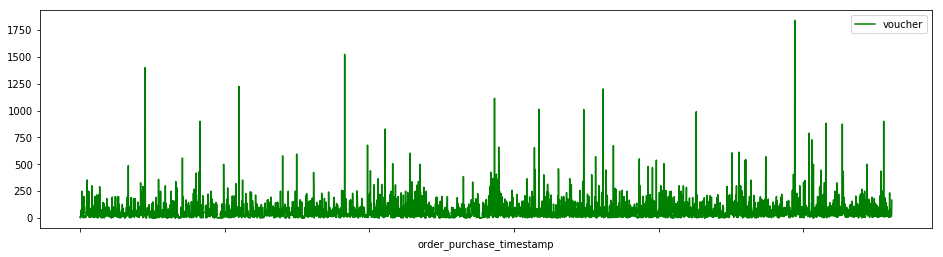

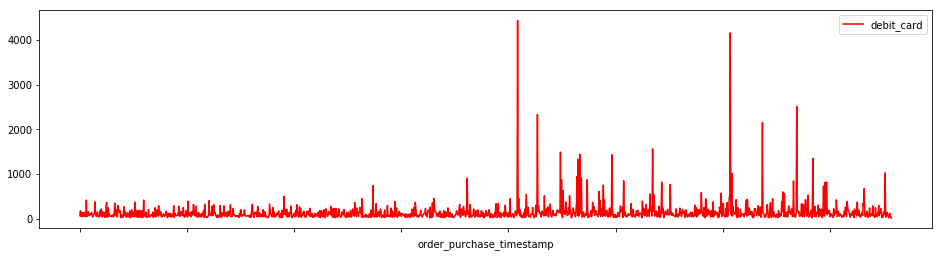

In [18]:
# Comportamiento en el tiempo por Tipo de Pago
payment_orders.sort_values(by=['order_purchase_timestamp'], inplace=True)
listPaymentT = ['credit_card','boleto','voucher','debit_card']
color = ['Blue','Orange','Green','Red']
for i,var in enumerate(listPaymentT):
    #print(var)
    temp = payment_orders[(payment_orders['payment_type'] == var)][['order_purchase_timestamp','payment_value']]
    temp.plot(figsize=(16, 4), kind='line',x='order_purchase_timestamp',y='payment_value', color=color[i] ,label = var)
    plt.tittle = 'Payment Type ' + var
    #plt.legend()
plt.show()

## In Monthly bases Credit card payment has shown changes in September, payments with boleto show some peak in may, july and november,debit-card is more used in Jun to august

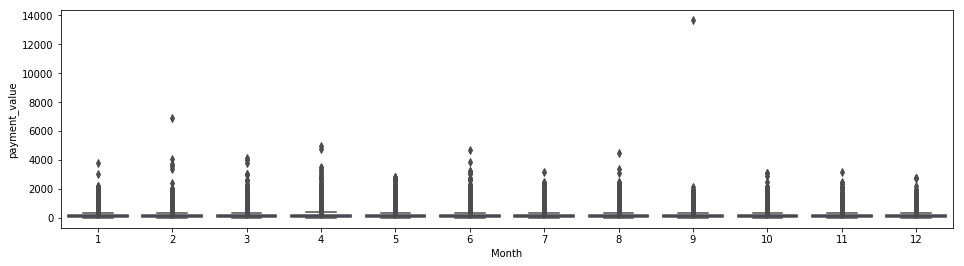

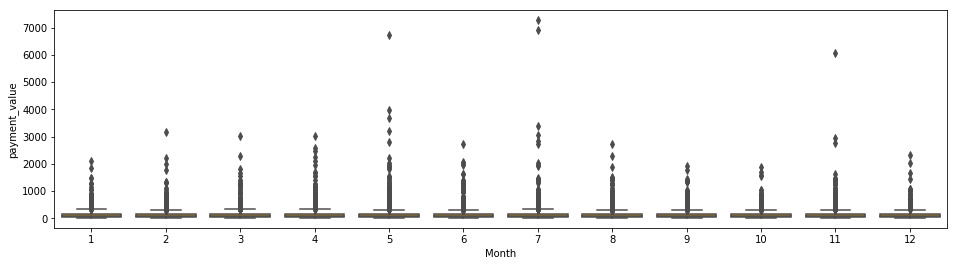

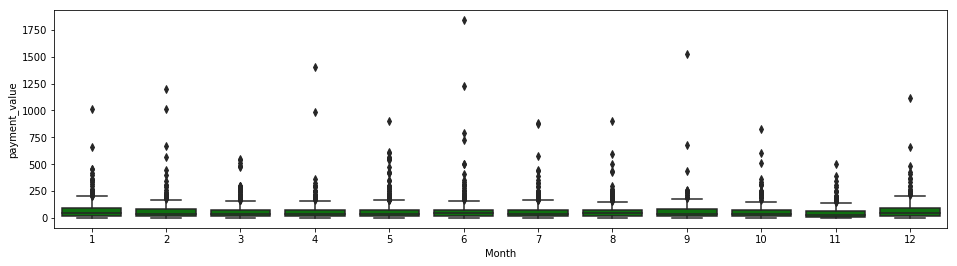

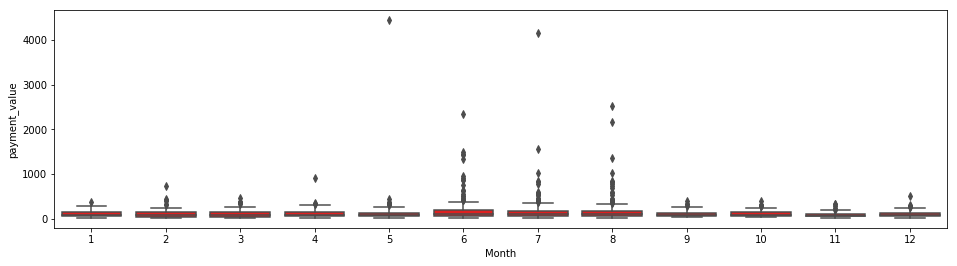

In [19]:
#Behavior Monthly by Payment Type

payment_orders.sort_values(by=['Month'], inplace=True)
listPaymentT = ['credit_card','boleto','voucher','debit_card']
color = ['Blue','Orange','Green','Red']

for i,var in enumerate(listPaymentT):
    plt.figure(figsize=(16, 4))
    #print(var)
    temp = payment_orders[(payment_orders['payment_type'] == var)][['Month','payment_value']]
    #plt.subplot(2,2,i+1)
    sns.boxplot(x='Month',y='payment_value', data=temp ,color=color[i])
    #plt.tittle = 'Payment Type ' + var
    #plt.legend()
    plt.show()

## Thursday and Saturday shows peaks of buyers in credit card, boletos and bouchers are some disperse along week.

credit_card


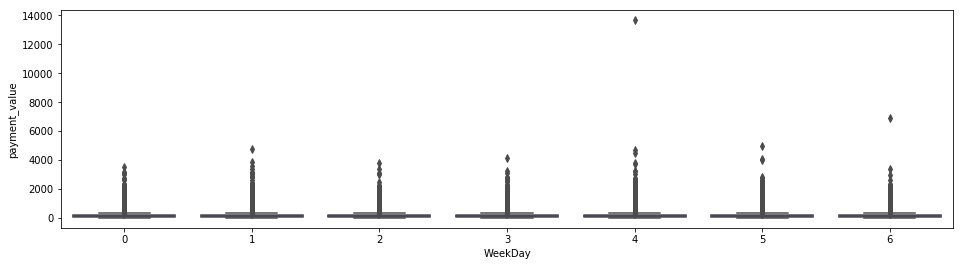

boleto


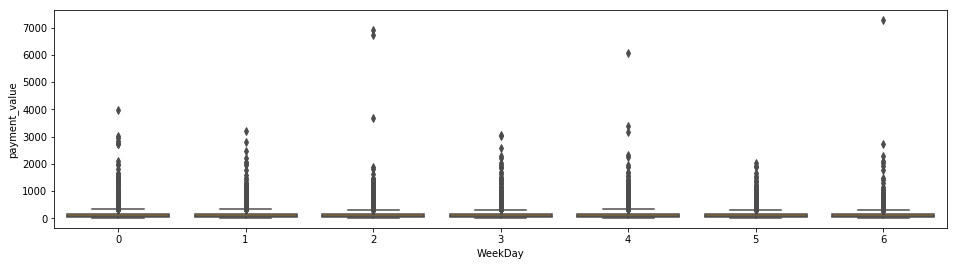

voucher


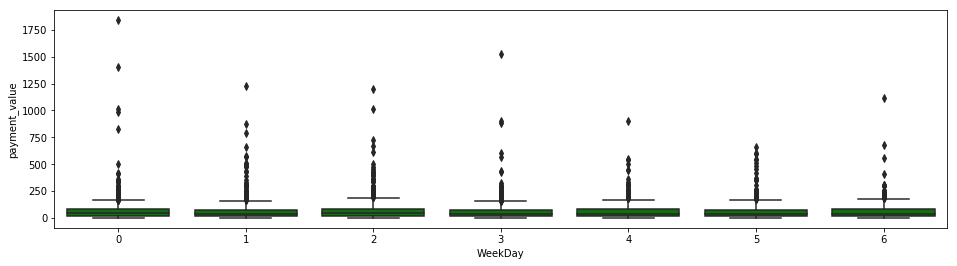

debit_card


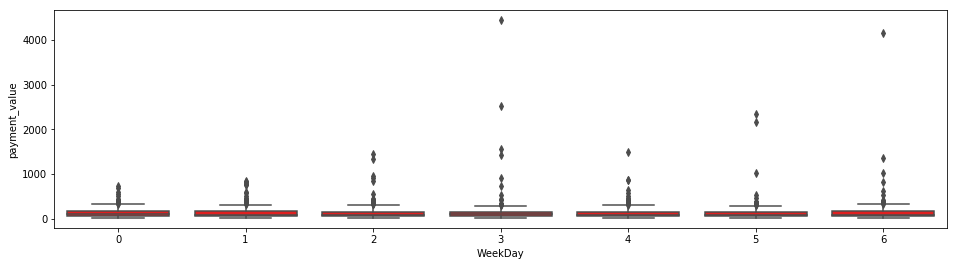

In [27]:
payment_orders.sort_values(by=['WeekDay'], inplace=True)
listPaymentT = ['credit_card','boleto','voucher','debit_card']
color = ['Blue','Orange','Green','Red']

for i,var in enumerate(listPaymentT):
    plt.figure(figsize=(16, 4))
    print(var)
    temp = payment_orders[(payment_orders['payment_type'] == var)][['WeekDay','payment_value']]
    sns.boxplot(x='WeekDay',y='payment_value', data=temp ,color=color[i])
    plt.show()

credit_card


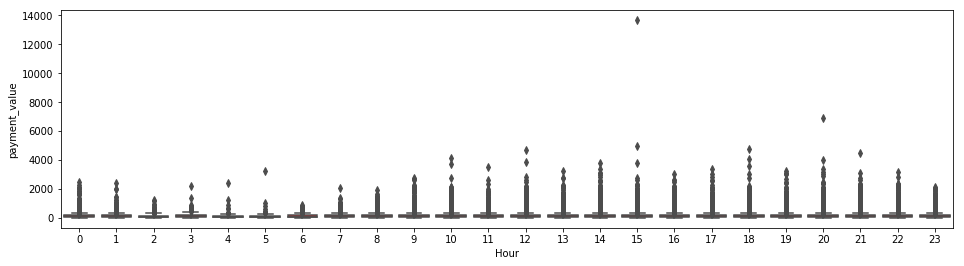

boleto


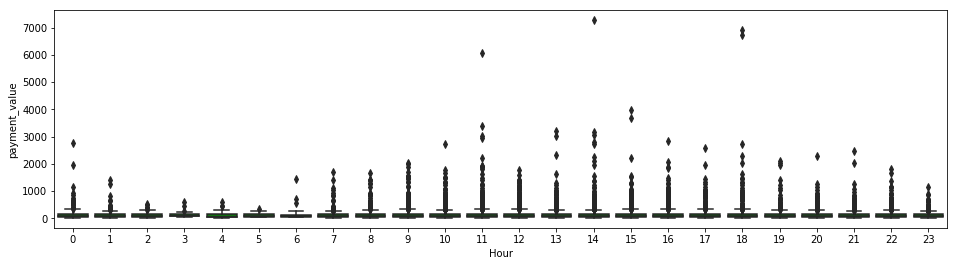

voucher


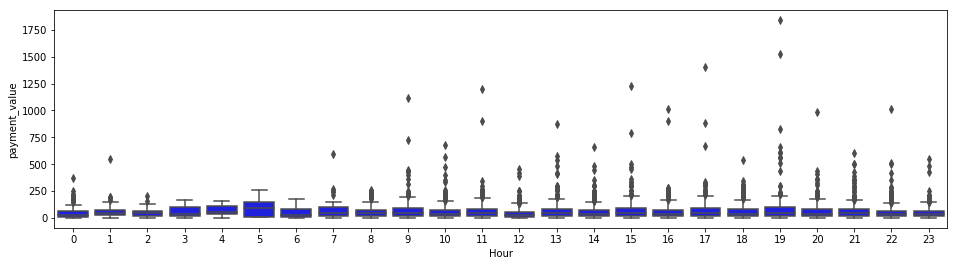

debit_card


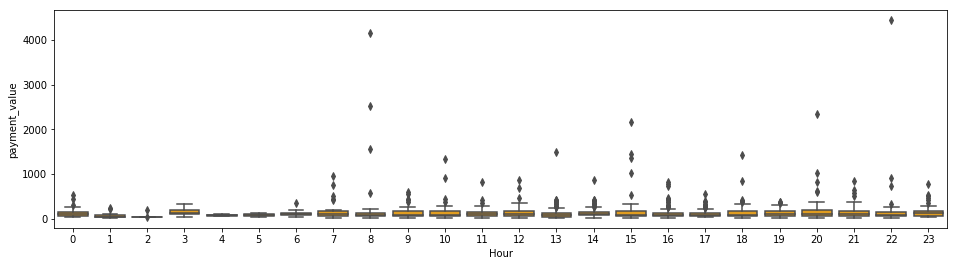

In [30]:
payment_orders.sort_values(by=['Hour'], inplace=True)
listPaymentT = ['credit_card','boleto','voucher','debit_card']
color = ['Red','Green','Blue','Orange']

for i,var in enumerate(listPaymentT):
    print(var)
    plt.figure(figsize=(16, 4))
    temp = payment_orders[(payment_orders['payment_type'] == var)][['Hour','payment_value']]
    sns.boxplot(x='Hour',y='payment_value', data=temp ,color=color[i])
    plt.show()


# Tendencias por cliente (relacion entre producto, tipo producto) HECTOR

In [103]:
#customer = pd.read_csv('Data/olist_customers_dataset.csv', delimiter=',') 
#geolocation=pd.read_csv('Data/olist_geolocation_dataset.csv', delimiter=',') 
#order_items=pd.read_csv('Data/olist_order_items_dataset.csv', delimiter=',') 
#order_payments=pd.read_csv('Data/olist_order_payments_dataset.csv', delimiter=',') 
#order_reviews=pd.read_csv('Data/olist_order_reviews_dataset.csv', delimiter=',') 
#orders=pd.read_csv('Data/olist_orders_dataset.csv', delimiter=',') 
#products=pd.read_csv('Data/olist_products_dataset.csv', delimiter=',') 
#sellers=pd.read_csv('Data/olist_sellers_dataset.csv', delimiter=',') 
#category=pd.read_csv('Data/product_category_name_translation.csv', delimiter=',') 

##  olist_sellers_dataset. ~ 3000 filas y 4 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|seller_id |STRING |Identificador único del vendedor|
|seller_zip_code_prefix |INT |Primeros 5 dígitos del código postal del vendedor|
|seller_city |STRING |Nombre de la ciudad del vendedor|
|seller_state |STRING |Estado del vendedor|

## olist_order robust_dataset. ~ 100,000 filas y 7 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|review_id |STRING |Identificador único de reseña|
|order_id |STRING |Identificador de pedido único|
|review_score |INT |Nota que va de 1 a 5 dada por el cliente en un encuesta de satisfacción.|
|review_comment_title |STRING |Título del comentario de la reseña que dejó el cliente,en portugues.|
|review_comment_message| STRING |Mensaje de comentario de la reseña que dejó el cliente, en portugués.|
|review_creation_date |STRING |Muestra la fecha en la que se realizó la encuesta de satisfacción.enviado al cliente.|
|review_answer_timestamp |STRING |Muestra la marca de tiempo de la respuesta de la encuesta de satisfacción.|

## olist_order_payments_dataset. ~ 100.000 filas y 5 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    
|---|---|---|
|order_id |STRING |Identificador único de un pedido.|
|Payment_sequential |INT |Los clientes pueden pagar con más de un pago método. Si lo hacen, se crea una secuencia para acomodar todos los pagos|
|payment_type |STRING |Método de pago elegido por el cliente.|
|payment_installments |INT |Número de cuotas elegidas por el cliente.|
|Payment_value |FLOAT |Valor de transacción (BRL).|

## olist_geolocation_dataset. ~ 1 millón de filas y 5 columnas.

Las columnas presentadas en este archivo son:

|CAMPO   |TIPO   |DESCRIPCION  |    |
|---|---|---|---|
|geolocation_zip_code_prefix |INT |Primeros cinco dígitos del código postal.|
|geolocatation_lat |FLOAT |Latitud asociada.|
|geolocation_lng |FLOAT |Longitud asociada.|
|geolocation_city |STRING |Nombre de la ciudad asociada.|
|geolocation_state |STRING |Nombre del estado asociado|